0.9421965317919075
Predicted:  good Data:  (2, 3, 0, 0, 0, 0) Actual:  good
N:  (array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.41421356, 1.41421356, 1.41421356]]), array([[1261,  556,  394, 1121,  428,  781, 1395,   38, 1066]]))
Predicted:  unacc Data:  (2, 1, 1, 2, 2, 2) Actual:  unacc
N:  (array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.41421356]]), array([[ 886,  729,  871,   91,  828, 1224,  108,  217,  188]]))
Predicted:  unacc Data:  (2, 3, 0, 1, 0, 0) Actual:  unacc
N:  (array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.41421356, 1.41421356, 1.41421356, 1.41421356]]), array([[ 808, 1066, 1350,  666,  421,  394,  836,  775,  781]]))
Predicted:  good Data:  (2, 1, 2, 0, 0, 1) Actual:  good
N:  (array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.41421356]]), array([[ 635,   41,  403, 

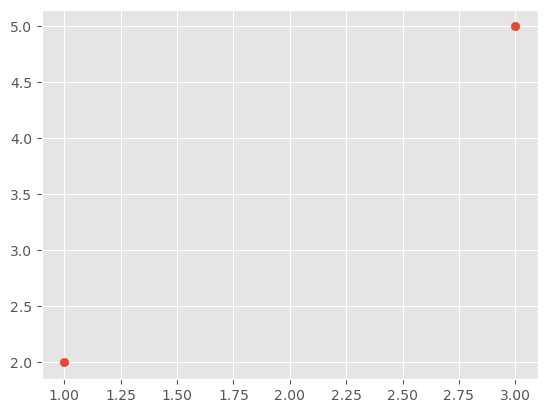

In [27]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model, preprocessing
from sklearn.neighbors import KNeighborsClassifier

data = pd.read_csv("car.data")

label = preprocessing.LabelEncoder()

buying = label.fit_transform(list(data["buying"]))
maint = label.fit_transform(list(data["maint"]))
door = label.fit_transform(list(data["door"]))
persons = label.fit_transform(list(data["persons"]))
lug_boot = label.fit_transform(list(data["lug_boot"]))
safety = label.fit_transform(list(data["safety"]))
cls = label.fit_transform(list(data["class"]))

predict = "class"

x = list(zip(buying, maint, door, persons, lug_boot, safety))
y = list(cls)

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

model = KNeighborsClassifier(n_neighbors=9)
model.fit(x_train, y_train)
acc = model.score(x_test, y_test)
print(acc)

predictions = model.predict(x_test)

names = ["unacc", "acc", "good", "vgood"]

for x in range(len(predictions)):
    print("Predicted: ", names[predictions[x]], "Data: ", x_test[x], "Actual: ", names[y_test[x]])
    n = model.kneighbors([x_test[x]], 9, True)
    print("N: ", n)

